In [1]:
# Aidan McEnaney
# April 25th, 2023

In [2]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [3]:
# Cell for functions

def stochGradDesc(func, theta, step, iters, size, yi):
    vals = [None] * (iters+1)
    vals[0] = list(theta)
    
    yi = random.choices(yi, k=size)
    
    for i in range(iters):
        for j in range(len(theta)):
            theta[j] = np.array(theta[j]) - step*(func(theta, yi))[j]
        vals[i+1] = list(theta)
        
    return theta, vals

def f(x, yi):
    tmp = 0
    
    for i in range(len(yi)):
        tmp += (x-yi[i])**2 - np.cos(x)
    
    return tmp

def df(x, yi): # Function for gradients
    tmp = 0
    
    for i in range(len(yi)):
        tmp += 2*x - 2*yi[i] + np.sin(x)
    
    return tmp/len(yi)

def ddf(x):
    return 2 + np.cos(x)


In [4]:
# Define variables and constants
n = 1000
nDet = 500
mu = 0
sigma = 1
L = 3 # L-Smooth constant for gradient
alpha = 1/L
steps = 30
batS = 1 # Batch Size
init_theta = [50]

yi = np.random.normal(mu, sigma, nDet)
yi = list(yi)
yi2 = [None] * (n-nDet)

for i in range(len(yi)):
    yi2[i] = -1 * yi[i]

yi = yi+yi2

theta, vals = stochGradDesc(df, init_theta, alpha, steps, batS, yi)

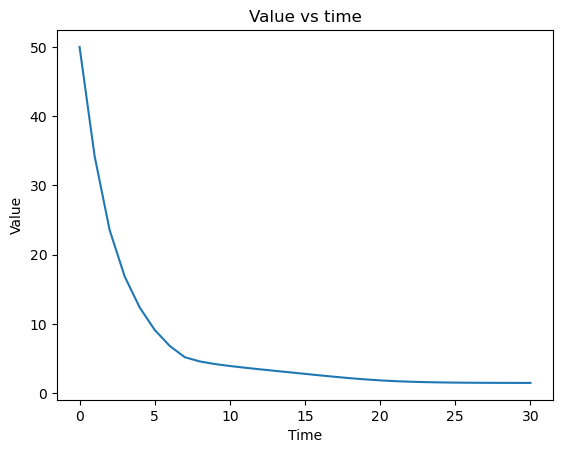

In [5]:
f = [None] * (len(vals))
x = range(len(vals))

for i in range(len(vals)):
    f[i] = np.linalg.norm(np.array(vals[i]) - np.array([0]))

plt.title("Value vs time")
plt.xlabel("Time")
plt.ylabel("Value")
plt.plot(x, f) 